In [1]:
!pip install transformers

In [2]:
!pip install vaderSentiment

In [3]:
from transformers import pipeline
from scipy.stats import ttest_rel, ttest_ind
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
sentiment_analysis = pipeline("sentiment-analysis")
analyzer = SentimentIntensityAnalyzer()

# Get the sentiment for a list of captions
def pipeline_sentiments(captions):
    return np.array([sentiment_analysis(caption)[0]['label'] for caption in captions])

def vader_sentiments(captions):
    return np.array([analyzer.polarity_scores(caption)['compound'] for caption in captions])

c:\Users\ewang\anaconda3\envs\cos429\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\ewang\anaconda3\envs\cos429\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [25]:
# captions = pd.read_csv("C:/Users/ewang/OneDrive/Desktop/Spring_2024/COS_429/Final/captions_GIT_20_percent.csv")
captions = pd.read_csv("C:/Users/ewang/OneDrive/Desktop/Spring_2024/COS_429/Final/captions_GIT_COS_20_percent.csv")

light_captions = captions["light_caption"]
dark_captions = captions["dark_caption"]
# t_stat, p_value = ttest_rel(sentiments_light, sentiments_dark)

In [26]:
pipeline_light = pipeline_sentiments(light_captions)
pipeline_dark = pipeline_sentiments(dark_captions)


In [27]:
vader_light = vader_sentiments(light_captions)
vader_dark = vader_sentiments(dark_captions)
# vader_diff = vader_light - vader_dark
# print(vader_diff.mean())

In [28]:
t_stat, p_value = ttest_rel(vader_light, vader_dark)
print(t_stat, p_value)

print(vader_light.mean(), vader_light.std() / len(vader_light)**(1/2))
print(vader_dark.mean(), vader_dark.std() / len(vader_dark)**(1/2))

-0.4253458938517063 0.6710041169435317
0.04274748858447488 0.007487734173407832
0.046699543378995435 0.007489880512019237


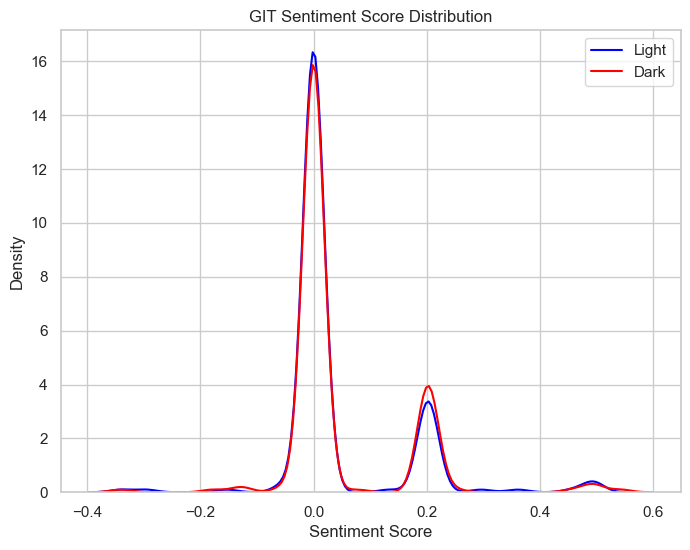

In [32]:
# Setting the style
sns.set(style="whitegrid")

# Creating the density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(vader_light, color="blue", label="Light", bw_adjust=0.5)
sns.kdeplot(vader_dark, color="red", label="Dark", bw_adjust=0.5)

plt.title("GIT Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.legend()
plt.show()

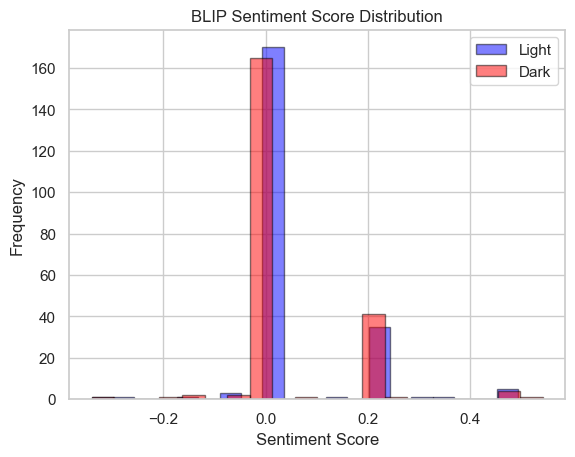

In [30]:
plt.hist(vader_light, bins=20, alpha=0.5, label='Light', color='blue', edgecolor='black')
plt.hist(vader_dark, bins=20, alpha=0.5, label='Dark', color='red', edgecolor='black')

plt.title("BLIP Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.show()

In [31]:
# Convert the output to a pandas Series
light_series = pd.Series(pipeline_light)
dark_series = pd.Series(pipeline_dark)

# Count the frequency of each label
light_counts = light_series.value_counts()
dark_counts = dark_series.value_counts()

# Create a contingency table
contingency_table = pd.DataFrame({'Light': light_counts, 'Dark': dark_counts})
contingency_table.fillna(0, inplace=True)  # Fill NaN with 0

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

Chi-square statistic: 0.5893904669792477
P-value: 0.4426549181873872
Degrees of freedom: 1
Expected frequencies:
[[119.5 119.5]
 [ 99.5  99.5]]
